# Install ISR

Avoir une version de python en 3.7.

In [ ]:
!pip install ISR -y

In [ ]:
!pip install h5py==2.10.0 #eventuellement redémarrer le notebook

# Predict

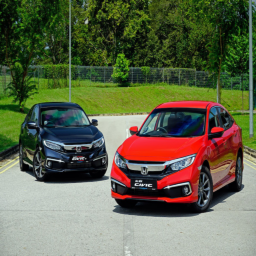

In [22]:
import numpy as np
from PIL import Image

img = Image.open('../dataset/raw_data/high_res/0.png')
img

In [23]:
from ISR.models import RDN, RRDN

#model = RDN(weights='noise-cancel')
model = RRDN(weights='gans')
#model = RDN(weights='psnr-small')
# model = RDN(weights='psnr-large')

## Bicubic

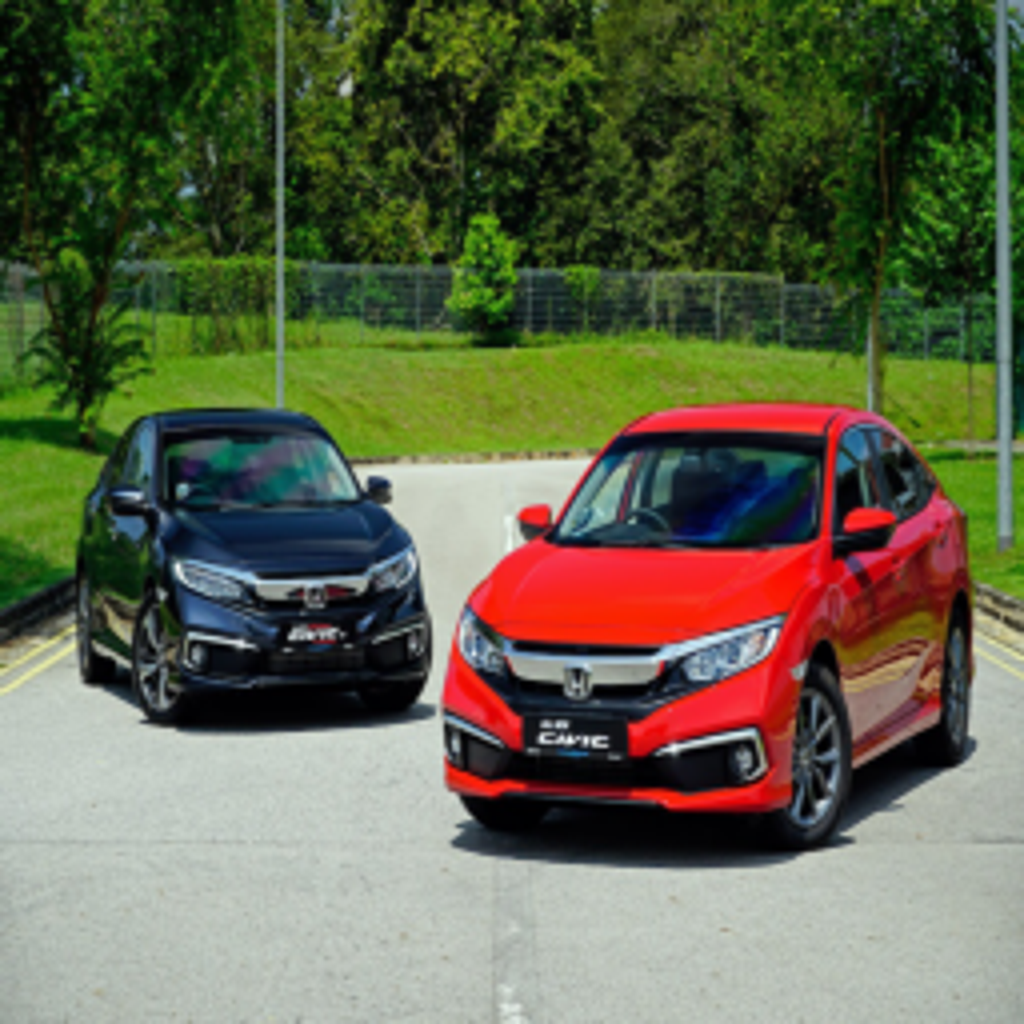

In [24]:
img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

## ISR

(256, 256, 3)


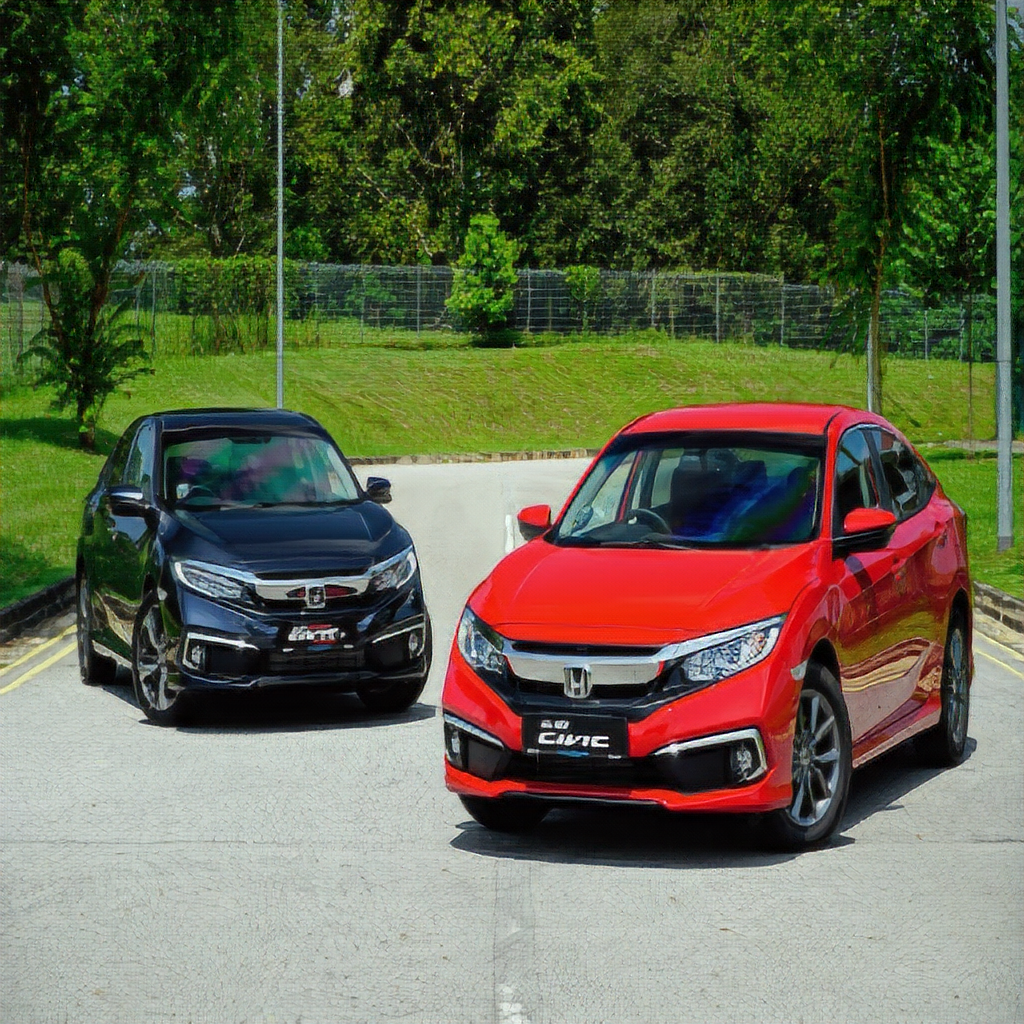

In [25]:
print(np.array(img)[:,:,:3].shape)
sr_img = model.predict(np.array(img)[:,:,:3])
Image.fromarray(sr_img)

# Test sur un dossier entier

In [ ]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='../dataset/raw_data/high_res/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')